In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import cf_helper_2 as cf_helper
import matplotlib.pyplot as plt
import importlib
%matplotlib notebook
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

importlib.reload(cf_helper)

<module 'cf_helper_2' from '/Users/hordia/dev/ML/course-ITBA-DL/course-notebooks-labs/kaggle-02-movie-classification/datos-estructurados-itba-2020/cf_helper_2.py'>

In [153]:
# Load train and test data from CSV files
all_data = pd.read_csv('train.csv', sep='\t') # train data, luego se splittea en train y validation
test_data = pd.read_csv('test.csv', sep=',') # final test


In [154]:
all_data.head()

,userId,movieId,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [155]:
all_data.drop(columns=['timestamp'], inplace=True)
all_data.head()

,userId,movieId,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [156]:
len(all_data)

80000

In [157]:
n_users = all_data["userId"].unique().shape[0]
print(n_users)
n_items = all_data["movieId"].unique().shape[0]
print(n_items)

943
1650


In [158]:
movie_items = all_data["movieId"].unique()
movie_items

array([   1,    2,    3, ...,  907, 1681, 1682])

In [159]:
max(movie_items)

1682

In [160]:
# test data
test_data.head()

,Id,userId,movieId,rating
0,0,1,6,3
1,1,1,10,3
2,2,1,12,3
3,3,1,14,2
4,4,1,17,4


In [161]:
# Rename the columns of test_data
#test_data.rename(columns={'userId': 'userOd', 'movieId': 'movieId', 'rating': 'rating'}, inplace=True)
test_data.drop(columns=['Id'], inplace=True)

In [12]:
test_data.head()

,userId,movieId,rating
0,1,6,3
1,1,10,3
2,1,12,3
3,1,14,2
4,1,17,4


Si asumo que los test data que tienen rating 0, son los que tengo que estimar, los remuevo en este paso, entreno y luego los completo

In [163]:
# Eliminar filas con rating igual a 0
df = test_data[test_data['rating'] != 0]
print(len(df))

15958


In [174]:
test_data = df

In [175]:
# header = ['userId', 'movieId', 'rating', 'timestamp']
# df = pd.read_csv('../ml-100k/u.data', sep='\t', names=header)
# all_data = df

A diferencia del otro dataset, todos los items no existen y tengo que usar

    n_items = np.max(dataframe[itemIndexTag].unique()) # cant de peliculas únicas (items)
    que toma el máximo y por lo tanto en la matriz me van a quedar columnas vacias?

en lugar de: (que tomaba el largo del vector, items únicos)
    #n_items = dataframe[itemIndexTag].unique().shape[0] # cant de peliculas únicas (items)

    una opción puede ser hacer una función de correspondencia entre items reales y los que uso en la matriz??
    

In [176]:
""" Incluye el split en train y test. El input es todo el dataset """
# Este split lo preciso para el primer dataset que es único. Si ya tengo separado en dos archivos puedo usar dos funciones
def get_user_item_matrix(dataframe, userIndexTag, itemIndexTag, ratingTag, test_size_ratio, base_1 = False):
    first = 0
    if base_1:
        first = 1
    
    n_users = dataframe[userIndexTag].unique().shape[0] # cant de usuarios únicos
    #n_items = dataframe[itemIndexTag].unique().shape[0] # cant de peliculas únicas (items)
    n_items = np.max(dataframe[itemIndexTag].unique()) # cant de peliculas únicas (items)
    print(n_users)
    print(n_items)
    
    train_data, test_data = train_test_split(dataframe, test_size=test_size_ratio)

    R = np.zeros((n_users, n_items))
    T = np.zeros((n_users, n_items))
    print(R.shape)

    # train_data iter
    for index, line in train_data.iterrows():
        R[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]

    # test_data iter
    for index, line in test_data.iterrows():
        T[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]
    print(T.shape)
    return R,T


In [177]:
# Este split lo preciso para el primer dataset que es único. Si ya tengo separado en dos archivos puedo usar dos funciones
R_train, R_test = get_user_item_matrix(
    all_data,
    'userId',
    'movieId',
    'rating',
    test_size_ratio=.25,
    base_1 = True)

943
1682
(943, 1682)
(943, 1682)


In [178]:
""" 
    El input es todo el dataset de train y el de test por separado, no hay split 
    para competencia de kaggle (que te da el csv de test por separado)
    ambos dataset deben coincidir con el mismo tag
"""
def get_user_item_matrix_no_split(train_data, test_data, userIndexTag, itemIndexTag, ratingTag, base_1 = False):
    first = 0
    if base_1:
        first = 1
 
    # Assuming you have df1 and df2 DataFrames
    # Concatenate vertically (along rows)
    concatenated_df = pd.concat([train_data, test_data], ignore_index=True)

    # Concatenate horizontally (along columns)
    # concatenated_df = pd.concat([train_data, test_data], axis=1)


    # calculados sobre el dataframe de train
    n_users = concatenated_df[userIndexTag].unique().shape[0] # cant de usuarios únicos
    n_items = concatenated_df[itemIndexTag].unique().shape[0] # cant de peliculas únicas (items)
    # n_items = np.max(concatenated_df[itemIndexTag].unique()) # cant de peliculas únicas (items)
    print(n_users)
    print(n_items)
    
    R = np.zeros((n_users, n_items))
    T = np.zeros((n_users, n_items))
    print(R.shape)

    # train_data iter
    for index, line in train_data.iterrows():
        R[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]

    # test_data iter
    for index, line in test_data.iterrows():
        T[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]
    print(T.shape)
    return R,T


In [179]:
len(all_data)

80000

In [180]:
len(test_data)

15958

In [181]:
concatenated_df = pd.concat([all_data, test_data], ignore_index=True)
len(concatenated_df)

95958

In [182]:
concatenated_df.head()


,userId,movieId,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [183]:
# (evitar) si hago esto va a generar un nuevo split diferente al que me habian pasado 
R_train, R_test = get_user_item_matrix(
    concatenated_df,
    'userId',
    'movieId',
    'rating',
    test_size_ratio=.25,
    base_1 = True)

943
1682
(943, 1682)
(943, 1682)


In [106]:
# sin split, se pasan los dataset previos (de competencia kaggle) 
R_train, R_test = get_user_item_matrix_no_split(
    all_data,
    test_data,
    'userId',
    'movieId',
    'rating',
    base_1 = True)

943
1682
(943, 1682)
(943, 1682)


In [184]:
R_rated_indexes_train = R_train.nonzero()
R_rated_indexes_test = R_test.nonzero()

In [185]:
I_train = R_train.copy()
T_test = R_test.copy()
I_train[I_train==0] = 0
I_train[I_train!=0] = 1
T_test[T_test==0] = 0
T_test[T_test!=0] = 1

In [186]:
def get_estimated_R(SM, R_tr, R_ts, R_rated_indexes_tr, R_rated_indexes_ts, k = -1, means = 0,divide_by_weights_sum = True, count_diag = False, relevant_rate = 1, perc_points = 100):
    if k==-1:
        R_est = cf_helper.predictions(R_tr, SM, divide_by_weights_sum= divide_by_weights_sum, count_diag = count_diag, means = means)
    else:
        R_est = cf_helper.predictions_K_neighbours(R_tr, SM, k=k, means = means, divide_by_weights_sum= divide_by_weights_sum, count_diag = count_diag)
    rmse_tr= cf_helper.rmse(R_tr,R_est)
    rmse_ts = cf_helper.rmse(R_ts, R_est)
    perc = cf_helper.get_percentiles(R_ts, R_est, like = relevant_rate, points = perc_points, number_of_random_items = 500)
    print(rmse_tr,rmse_ts)
    return R_est, perc, rmse_ts

In [187]:
perc_points = 100
relevant_rate = 5

In [188]:
SM_pearson2, user_means2 = cf_helper.getPearsonSimilarityMatrix_non_zeros(R_train)

In [189]:
SM_jaccard, _ = cf_helper.calcultaSimilarityMatrix(R_train, dist_type ='jaccard_with_negatives')
SM_pearson, user_means = cf_helper.calcultaSimilarityMatrix(R_train, dist_type ='pearson')
SM_cosine, _ = cf_helper.calcultaSimilarityMatrix(R_train, dist_type ='cosine')

In [190]:
R_train.shape

(943, 1682)

In [191]:
R_test.shape

(943, 1682)

In [192]:
R_est_pearson2, perc_pearson2, rmse_pearson2 = get_estimated_R(SM_pearson2, R_train, R_test, R_rated_indexes_train, 
                                                               R_rated_indexes_test, 
                                                               means = user_means2, perc_points = perc_points, relevant_rate = relevant_rate)

1.557505906639889 1.6170319049616524


In [193]:
R_est_pearson, perc_pearson, rmse_pearson = get_estimated_R(SM_pearson, R_train, R_test, R_rated_indexes_train, 
                                                            R_rated_indexes_test, means = user_means, 
                                                            perc_points = perc_points, relevant_rate = relevant_rate)

2.834042761220603 2.8902883467509133


In [194]:
R_est_cosine, perc_cosine, rmse_cosine = get_estimated_R(SM_cosine, R_train, R_test, R_rated_indexes_train, R_rated_indexes_test, perc_points = perc_points, relevant_rate = relevant_rate, means = 0)

2.9293831467538562 2.970972388309776


In [195]:
R_est_jaccard, perc_jaccard, rmse_jaccard = get_estimated_R(SM_jaccard,R_train, R_test, R_rated_indexes_train, R_rated_indexes_test, perc_points = perc_points, relevant_rate = relevant_rate)

2.891127389773676 2.9354817147178576


In [196]:
mu_train = R_train[R_rated_indexes_train].mean()
percentiles_train_media = cf_helper.get_percentiles(R_test, mu_train*np.ones(R_train.shape), like = 5)

In [197]:
def get_biased_data(R_tr, bias):
    R_tr_b = R_tr.copy()
    R_tr_b[R_tr==0] = bias
    return R_tr_b

In [198]:
R_train_biased = get_biased_data(R_train, mu_train)
SM_biased, user_means_biased = cf_helper.calcultaSimilarityMatrix(R_train_biased, dist_type ='pearson')
R_est_biased, perc_biased, rmse_biased = get_estimated_R(SM_biased, R_train_biased, R_test, R_rated_indexes_train, R_rated_indexes_test, means=user_means_biased, relevant_rate = relevant_rate)

0.23685878577137678 1.1517874923300884


/Users/hordia/dev/ML/course-ITBA-DL/course-notebooks-labs/kaggle-02-movie-classification/datos-estructurados-itba-2020/cf_helper_2.py:537: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


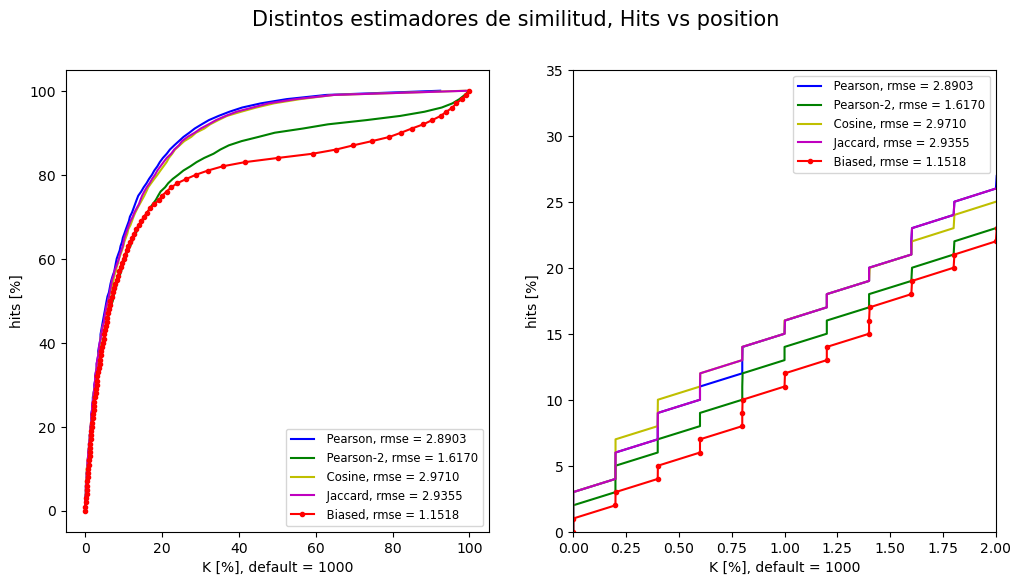

In [199]:
%matplotlib inline
perc_basis_vect = [perc_pearson, perc_pearson2,perc_cosine, perc_jaccard, perc_biased]
rmse_basis_vect = [rmse_pearson, rmse_pearson2,rmse_cosine, rmse_jaccard, rmse_biased]
names_basis_vect = ['Pearson','Pearson-2','Cosine','Jaccard', 'Biased']
cf_helper.plot_percentiles(names_basis_vect, rmse_basis_vect, perc_basis_vect,
                 parameter_name ='', title= 'Distintos estimadores de similitud, Hits vs position',
                 featured_idx = 4, featured_text = 'Biased')


 Ejemplo: si k=2 y hits=30 
 El 30% de los items relevantes se encuentran dentro de los primeros 20 items (1000 * k/100)


/var/folders/zf/fg68pxbn0ys0ljbx0b3pmxrw0000gq/T/ipykernel_98625/3592684946.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


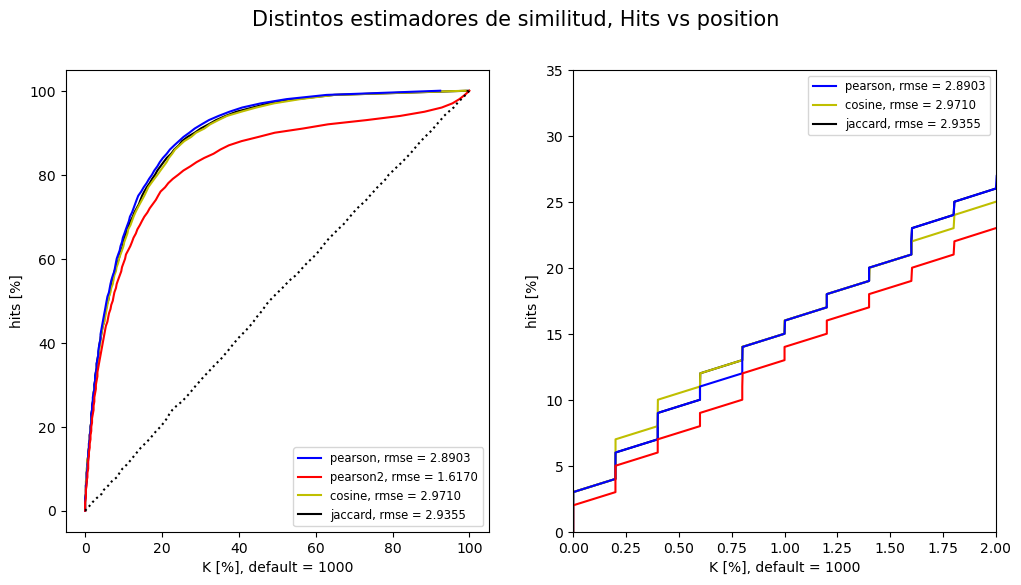

In [200]:
f, ([ax1, ax2]) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(12, 6)) #, figsize=(10, 10)

plt_jaccard, = ax1.plot(*perc_jaccard, color = 'k', label = 'jaccard, rmse = %.4f'%rmse_jaccard)
plt_cosine, = ax1.plot(*perc_cosine, color = 'y', label = 'cosine, rmse = %.4f'%rmse_cosine)
plt_pearson, = ax1.plot(*perc_pearson, color = 'b', label = 'pearson, rmse = %.4f'%rmse_pearson)
plt_pearson2, = ax1.plot(*perc_pearson2, color = 'r', label = 'pearson2, rmse = %.4f'%rmse_pearson2)

ax1.plot(*percentiles_train_media, linestyle = ":", color = 'k')

ax1.legend(handles=[plt_pearson, plt_pearson2, plt_cosine, plt_jaccard], loc = 'best', prop = fontP)
ax1.set_xlabel('K [%], default = 1000')
ax1.set_ylabel('hits [%]')

ax2.plot(*perc_jaccard,  color = 'k')
ax2.plot(*perc_cosine,  color = 'y')
ax2.plot(*perc_pearson, color = 'b')
ax2.plot(*perc_pearson2, color = 'r')

ax2.legend(handles=[plt_pearson, plt_cosine, plt_jaccard], loc = 'best', prop = fontP)
ax2.set_xlabel('K [%], default = 1000')
ax2.set_ylabel('hits [%]')
ax2.set_ylim([0,35])
ax2.set_xlim([0,2])

print('\n Ejemplo: si k=2 y hits=30 \n El 30% de los items relevantes se encuentran dentro de los primeros 20 items (1000 * k/100)')
f.suptitle('Distintos estimadores de similitud, Hits vs position', fontsize = 15)
f.show()

In [201]:
# Matrix Factorization

In [202]:
from cf_helper_2 import Matrix_Factorization_baselines_SGD

In [203]:
mu = R_train[R_train.nonzero() ].mean()

In [263]:
from scipy.sparse.linalg import svds
def SVD(users_items_train_matrix, k = 20):
    #get SVD components from train matrix. Choose k.
    u, s, vt = svds(users_items_train_matrix, k)
    s_diag_matrix=np.diag(s)
    X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
    return X_pred

In [264]:
a = SVD(R_train,k=12)

def accuracy(R, R_rated_indexes, R_estimated, threshold, like = 1, dislike = -1):

In [265]:
print(a)

[[ 3.82439578e+00  1.51382295e+00  7.02034295e-01 ... -9.99366909e-03
   1.96852773e-02  5.69143492e-02]
 [ 1.76344924e+00  1.42384157e-01  2.38114965e-01 ...  5.88584965e-03
  -2.29694094e-03 -1.23076797e-02]
 [-5.51866799e-01 -3.34229975e-02  2.55448052e-02 ...  2.22474476e-02
   6.05097292e-04 -9.52765548e-03]
 ...
 [ 1.49667217e+00 -6.76366342e-02  1.63558536e-01 ...  3.90382389e-04
  -6.72252776e-04 -3.07442730e-03]
 [ 2.16578371e-01 -4.54254079e-02 -2.00559209e-01 ...  1.26722423e-02
   6.68893140e-03 -2.71838930e-02]
 [ 8.36003883e-01  1.54095925e+00  7.12306241e-01 ... -9.58427962e-03
   3.54565444e-02  4.05542817e-02]]


In [245]:
num_epochs = 400
# num_epochs = 200
# num_epochs = 100


In [246]:
# gamma: Learning rate

# n_epochs: Number of epochs
# R_train: likes and dislikes user-item training matrix
# k: Dimensionality of the latent feature space
# lmbda: L2 regularization
# gamma: Learning rate
# alpha: momentum
# sigma: P and Q standard deviation
# error_calc_frec: calculate errors every error_calc_frec cicles
"""
    P = np.random.normal(0,sigma,(k,m)) # Latent user feature matrix
    Q = np.random.normal(0,sigma,(k,n)) # Latent likes/dislikes feature matrix
"""

k = 18 # el default
k = 12 # el óptimo?
P, Q, bu, bi, train_rmse_vector, test_rmse_vector, train_accuracy_vector, test_accuracy_vector, gamma, lmbda \
= Matrix_Factorization_baselines_SGD(R_train , R_test, R_rated_indexes_train, R_rated_indexes_test, mu, k=18 
                                     ,sigma = 0.002,
                           gamma= 0.01, lmbda = 0.15, alpha = 0., 
                           n_epochs = num_epochs, error_calc_frec = 1,
                           accuracy_thres = 0, like = 1, dislike = -1)

epoch = -1 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.181078, 1.183863)
epoch = 0 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.071073, 1.083550)
epoch = 1 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.053462, 1.070410)
epoch = 2 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.045579, 1.065211)
epoch = 3 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.041125, 1.062513)
epoch = 4 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.038296, 1.060925)
epoch = 5 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.036361, 1.059919)
epoch = 6 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.034966, 1.059253)
epoch = 7 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.033920, 1.058796)
epoch = 8 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (1.033109, 1.058476)
epoch = 9 accuracy (train, test): (9.0207, 9.1872), rmse (train, test

Para el dataset 2, splitteando: (solo se cargó el train.csv y se splitteo)
    
epoch = 400 accuracy (train, test): (5.8600, 6.0150), rmse (train, test): (0.740145, 0.922937)

ver getStats()
print('accuracy (train, test): (%.4f, %.4f), rmse (train, test): (%.6f, %.6f)' %(acurracy_tr*100, acurracy_te*100, rmse_tr, rmse_te))

---

Modificando el k y otros parámetros y sacando del "train" los items con rating 0, se mejoró:

epoch = 400 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (0.856589, 1.056677)

In [266]:
mu

3.356380613606047

In [267]:
from cf_helper_2 import estimate_rates

In [268]:
user = 1
movie_item = 4
prediction = estimate_rates(mu, bu[user], bi[movie_item], P=P[:,user], Q=Q[:,movie_item])
print(prediction)

[3.33621344]


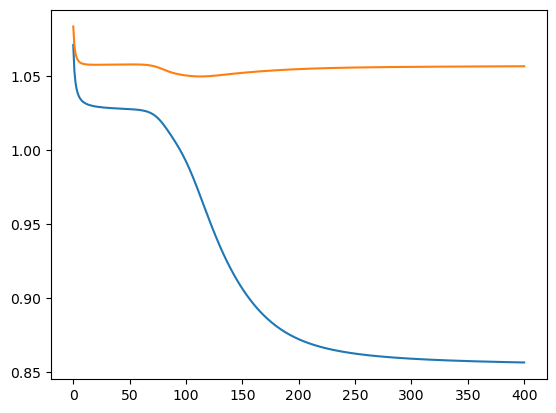

In [269]:
plt.plot(train_rmse_vector)
plt.plot(test_rmse_vector)
plt.show()

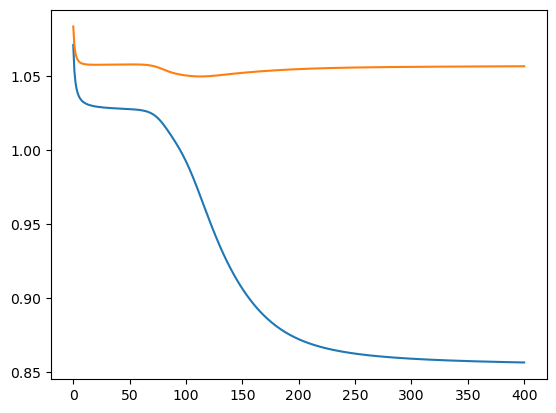

In [270]:
# Lambda = 0.1
plt.plot(train_rmse_vector)
plt.plot(test_rmse_vector)
plt.show()

### Las del dataset de test.csv que tienen rating 0 son las que tengo que predecir

In [271]:
R_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [272]:
train_accuracy_vector[-1]

0.09020675855935971

In [273]:
test_accuracy_vector[-1]

0.09187161317215506

In [274]:
test_data = pd.read_csv('test.csv', sep=',') # final test

In [275]:
test_data.head()

,Id,userId,movieId,rating
0,0,1,6,3
1,1,1,10,3
2,2,1,12,3
3,3,1,14,2
4,4,1,17,4


In [276]:
# Todas las peliculas que el usuario 1 califico

test_data[test_data['userId'] == 1]

,Id,userId,movieId,rating
0,0,1,6,3
1,1,1,10,3
2,2,1,12,3
3,3,1,14,2
4,4,1,17,4
...,...,...,...,...
132,132,1,264,4
133,133,1,265,2
134,134,1,266,3
135,135,1,267,1


This data set consists of:
	
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	
	* Each user has rated at least 20 movies. 
 
        * Simple demographic info for the users (age, gender, occupation, zip)

In [277]:
#entonces las que tengo que predecir
test_data[test_data['rating'] == 0]

,Id,userId,movieId,rating
17,17,1,53,0
20,20,1,60,0
25,25,1,67,0
26,26,1,69,0
28,28,1,72,0
...,...,...,...,...
19988,19988,457,366,0
19995,19995,458,648,0
19996,19996,458,1101,0
19998,19998,460,10,0


Evalución (RMSE o Accuracy en testing)
- Se deja un conjunto de calificaciones en test
- Una vez entrenado el modelo se evalúan los resultados en test
- Si son ratings entre 1 y 5 por ejemplo, se puede calcular el RMSE sobre
todas las películas que se hayan votado en test
- Si son likes, se podrían ver que porcentaje de las “likeadas” tiene
probabilidad alta de ser likeada (Definir umbral)

In [278]:
# esto se tiene que poder resolver aplicando una función tipo lambda a test_data[test_data['rating'] == 0] 
# TODO: hacerlo más eficiente
for index, row in test_data.iterrows():
    # print(index, row['rating'])
    if row['rating']==0:
        # row['rating'] = 4 # predicted 
        user = row['userId']
        movie_item = row['movieId']
        prediction = estimate_rates(mu, bu[user], bi[movie_item], P=P[:,user], Q=Q[:,movie_item])
        print(prediction) 
        row['rating'] = np.round(prediction) # redondeo porque los ratings son de 1 al 5 

[3.15313122]
[3.03054916]
[2.92171107]
[3.56930932]
[3.02875277]
[3.34313535]
[3.48941749]
[2.5845649]
[3.7139773]
[3.50471923]
[2.72917362]
[2.27193591]
[3.18688401]
[3.34381662]
[3.76933285]
[2.99368502]
[3.27405414]
[3.44275433]
[3.92478844]
[3.25037434]
[3.32867917]
[3.38483891]
[3.17481375]
[2.79134099]
[2.62621294]
[2.90024266]
[2.3282349]
[3.12082624]
[4.17959567]
[3.44621181]
[3.17487473]
[3.13176191]
[3.09731596]
[2.25738612]
[2.62517285]
[2.64925355]
[2.38267455]
[3.05100843]
[2.26034888]
[2.81105262]
[3.23098404]
[3.2917397]
[2.93786388]
[2.79702541]
[2.89032243]
[1.87789981]
[3.29167011]
[3.21594948]
[3.26053914]
[2.34669775]
[3.33199594]
[2.53661703]
[3.38929087]
[2.97383044]
[3.7284065]
[3.09878056]
[3.88686939]
[3.72909686]
[3.65276485]
[3.65589779]
[3.94261621]
[3.89005055]
[3.49928771]
[3.56086351]
[2.74259415]
[3.17552728]
[3.86045122]
[3.81544313]
[3.47412472]
[3.93204636]
[3.72171041]
[3.43580915]
[3.5394479]
[3.7638042]
[4.43371684]
[3.70215011]
[3.6586709]
[3.9072

In [281]:
test_data.to_csv('test-with-predicted.csv', index=False) # ya tiene una columna índice, no agregar otra